In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [5]:
relevant_errors = [
'error',
'fatal error',
'warning',
'-fpermissive',
'-Wchanges-meaning',
'-Wvexing-parse']

error_indexes = {val: idx for idx, val in enumerate(relevant_errors)}


In [6]:
def counter(filename):
    file = open(filename)
    file_json = json.load(file)
    list_dicts_results = [{'WA': 0, 'CE': 0, 'RTE': 0, 'TLE':0, 'AC': 0} for _ in relevant_errors]
    for envio in file_json:
        try:
            judge_result = file_json[envio]['judge_result']
            
            for error in file_json[envio]['error_list']:
                index = error_indexes[error['error_name']]
                list_dicts_results[index][judge_result] += 1
        except KeyError:
            continue
    return list_dicts_results

In [7]:
list_dicts_results = counter('claseGcc.json')
for i, dic in enumerate(list_dicts_results):
    list_dicts_results[i] = {key:dic[key] for key in dic.keys() if dic[key] > 0}
    

for error, dic in zip(relevant_errors, list_dicts_results):
    print(error, ': ', dic)

error :  {'WA': 60, 'CE': 319, 'RTE': 12, 'TLE': 24, 'AC': 149}
fatal error :  {'CE': 60, 'RTE': 1}
-fpermissive :  {'CE': 7}
-Wchanges-meaning :  {'CE': 1}
-Wvexing-parse :  {'WA': 1}


In [8]:
list_dict_percentages = []

for i, dic in enumerate(list_dicts_results):
    s = sum(dic.values())
    dic_percentage = {key:str(round((dic[key] * 100.0 / s), 2)) + "%" for key in dic.keys()}
    list_dict_percentages.append(dic_percentage)

for error, dic in zip(relevant_errors, list_dict_percentages):
    print(error, ': ', dic)

error :  {'WA': '10.64%', 'CE': '56.56%', 'RTE': '2.13%', 'TLE': '4.26%', 'AC': '26.42%'}
fatal error :  {'CE': '98.36%', 'RTE': '1.64%'}
-fpermissive :  {'CE': '100.0%'}
-Wchanges-meaning :  {'CE': '100.0%'}
-Wvexing-parse :  {'WA': '100.0%'}


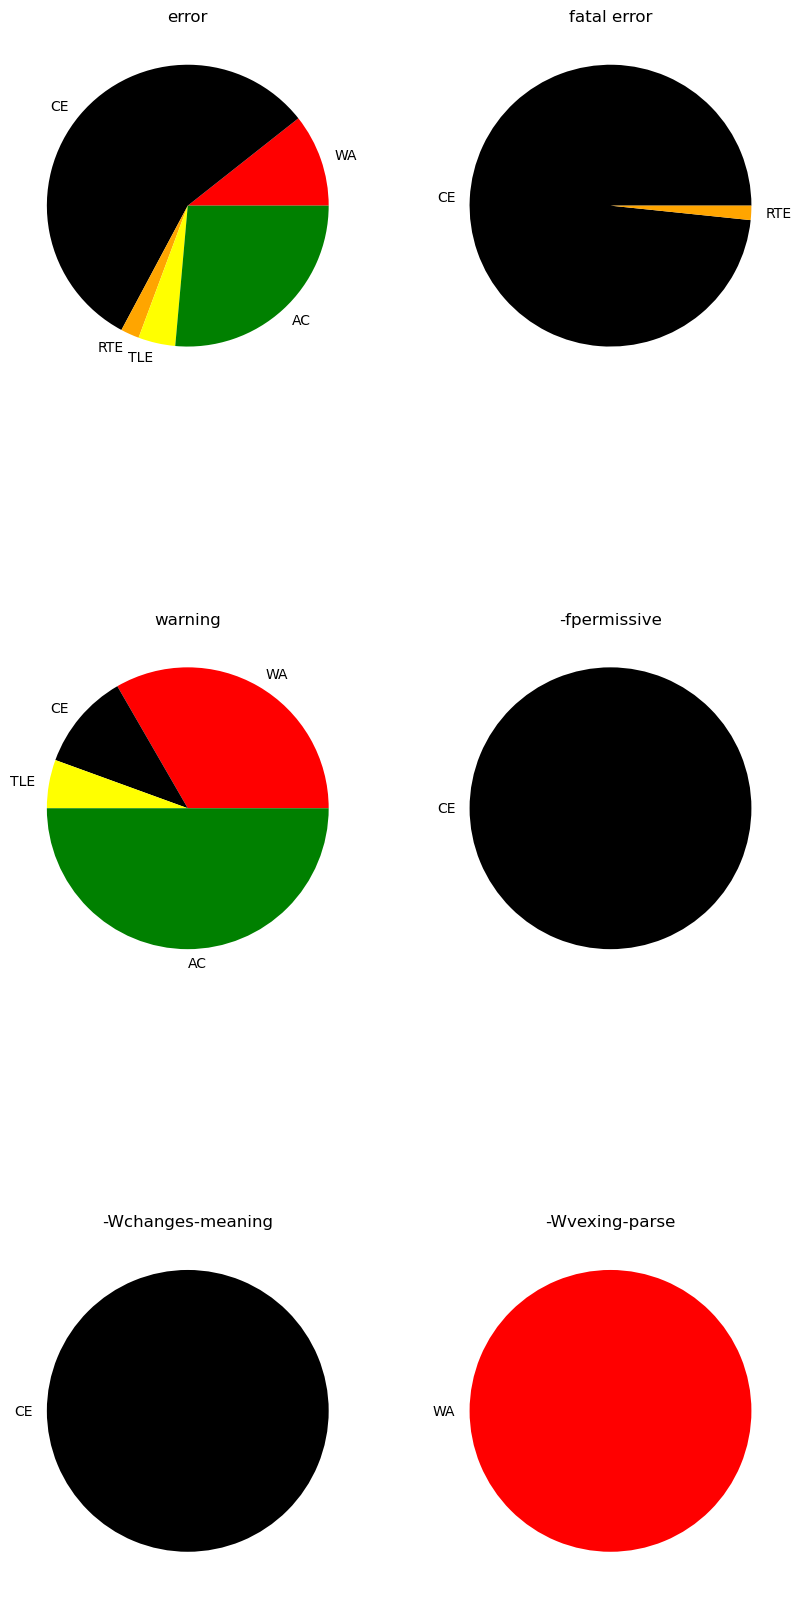

In [10]:
plt.rcParams['figure.figsize'] = [10, 30]
count = 1
custom_colors = {'AC': 'green', 'WA': 'red', 'TLE': 'yellow', 'RTE': 'orange', 'CE': 'black','OLE': 'blue'}
for error, dic in zip(relevant_errors, list_dicts_results):
    plt.subplot(len(relevant_errors)//2+1, 2, count)
    plt.pie(dic.values(), labels=dic.keys(), colors=[custom_colors.get(label, 'blue') for label in dic.keys()])
    plt.title(error)
    count += 1

plt.savefig('results_per_error.png')